# PIVpy getting started notebook:

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import pivpy and dependencies

here we import the package code so that we can use it next 

In [1]:
import os, sys 
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [2]:
# pointer to the directory with the data
import pkg_resources as pkg
path_to_data  = pkg.resource_filename('pivpy','data')
# list the directory
# os.listdir(path_to_data)

In [3]:
# let's read only the files from the Run* 
data = io.load_directory(os.path.join(path_to_data,'Insight')) # you can add also: basename='day2a*',ext='.vec')

In [4]:
# let's check if it's read:
data.attrs['files']

['/home/user/.cache/Python-Eggs/pivpy-0.0.7-py3.7.egg-tmp/pivpy/data/Insight/Run000001.T000.D000.P000.H001.L.vec',
 '/home/user/.cache/Python-Eggs/pivpy-0.0.7-py3.7.egg-tmp/pivpy/data/Insight/Run000002.T000.D000.P000.H001.L.vec',
 '/home/user/.cache/Python-Eggs/pivpy-0.0.7-py3.7.egg-tmp/pivpy/data/Insight/Run000003.T000.D000.P000.H001.L.vec',
 '/home/user/.cache/Python-Eggs/pivpy-0.0.7-py3.7.egg-tmp/pivpy/data/Insight/Run000004.T000.D000.P000.H001.L.vec',
 '/home/user/.cache/Python-Eggs/pivpy-0.0.7-py3.7.egg-tmp/pivpy/data/Insight/Run000005.T000.D000.P000.H001.L.vec']

### step 3 - plot some arrows

first things first - show a quiver plot

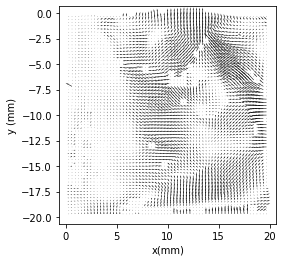

In [5]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=20)

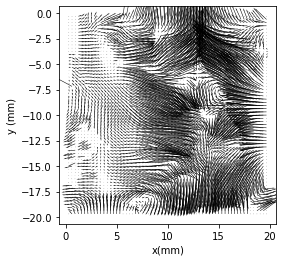

In [6]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=3, arrScale=5)

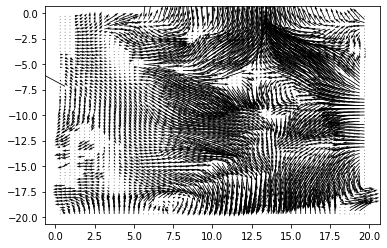

In [7]:
tmp = data.isel(t=0)
plt.quiver(tmp.x,tmp.y,tmp.u.T,tmp.v.T,scale=1)

In [8]:
# we can read also a single file only into a 1 frame dataset
d = io.load_vec(os.path.join(path_to_data,'Insight/Run000001.T000.D000.P000.H001.L.vec'))

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd2bb74090>)

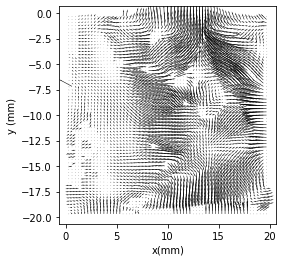

In [9]:
graphics.quiver(d.isel(t=0),arrScale=10)

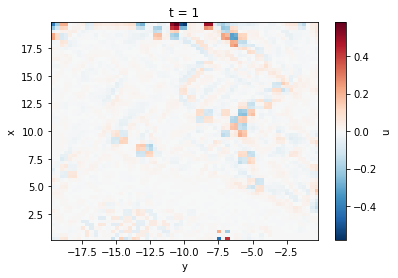

In [10]:
d.isel(t=0).differentiate(coord='x').differentiate(coord='y')['u'].plot.pcolormesh()

and a vorticity map

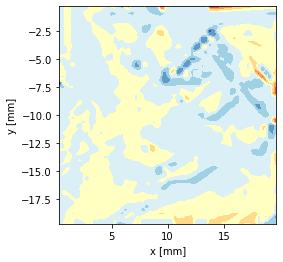

In [11]:
# prepare vorticity
d.piv.vec2scal(property='curl') # it will appear as d['w'] variable, 'w' for all scalar properties

# plot
fig, ax = graphics.contour_plot(d)

Also, velocity histograms in x and y directions

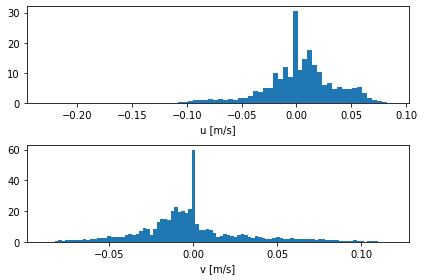

In [12]:
fig, ax = graphics.histogram(data, normed = True)

We can also plot a whole list of vec's as subplots:

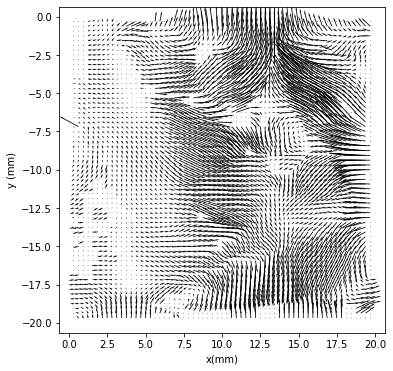

In [13]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system

__Addition and Scalar multiplication__

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd298fefd0>)

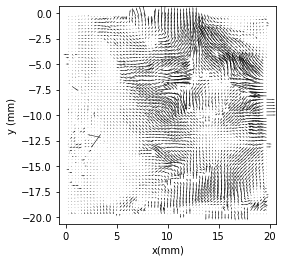

In [14]:
v = (data + 3*data - 2 * data.isel(t=0)) / 3.
graphics.quiver(v.isel(t=-1), arrScale=10,units=data.attrs['units'])

__Crop__

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd29a582d0>)

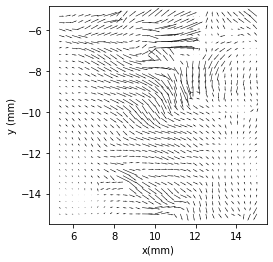

In [15]:
v = v.piv.crop([5,15,-5,-15])  #(xmin, xmax, ymin, ymax)
graphics.quiver(v.isel(t=-1), arrScale=10,units=data.attrs['units'])

__Rotate__

In [16]:
# v.piv.rotate(90) # not implemented

__Translation of Coordinate System__

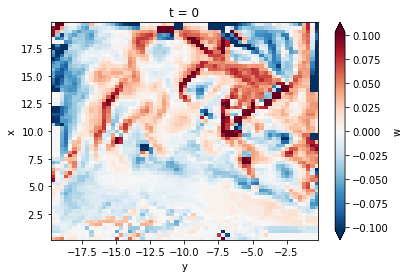

In [17]:
# we can also use some default plot from xarray
data.piv.vorticity()
data.isel(t=0)['w'].plot(robust=True)

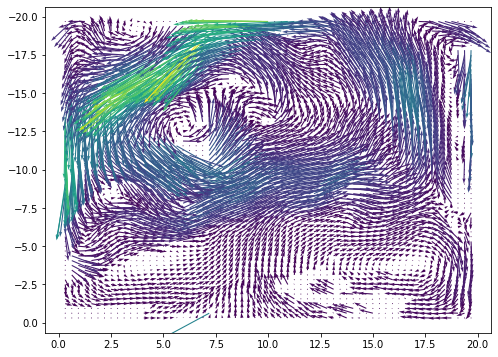

In [18]:
# low level quiver
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[:,:,0], -data.v[:,:,0] ,data.u[:,:,0]**2 + data.v[:,:,0]**2,scale=.75)
plt.gca().invert_yaxis()

In [19]:
test = io.create_sample_field(rows=25,cols=5)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd296fbc90>)

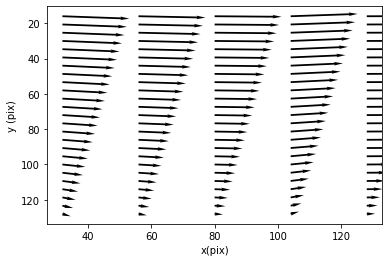

In [20]:
graphics.quiver(test,arrScale=5,aspectratio='auto')

In [21]:
data = io.load_vec(os.path.join(path_to_data,'openpiv/exp1_001_b.vec'))

In [22]:
variables,units,rows,cols, dt, frame = io.parse_header(os.path.join(path_to_data,'openpiv/exp1_001_b.vec'))
variables,units,rows,cols, dt, frame

(['x', 'y', 'u', 'v'], ['pix', 'pix', 'pix/dt', 'pix/dt'], None, None, None, 1)

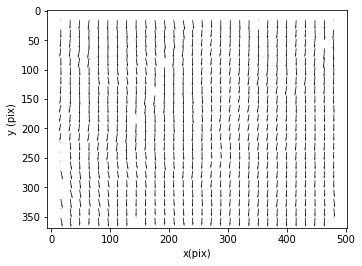

In [23]:
data.piv.quiver()

In [24]:
data = io.load_directory(os.path.join(path_to_data,'urban_canopy/'),ext='.vc7')

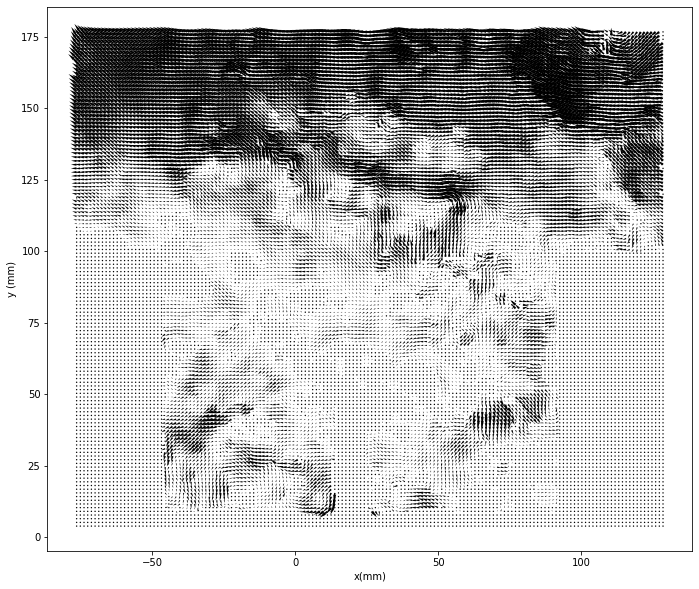

In [25]:
data.piv.quiver(arrScale=40)
plt.gcf().set_size_inches(12,10)

In [26]:
data.attrs['units'][0] == 'mm'

True